## Advanced Regression

Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
prop = pd.read_csv("train.csv")

In [3]:
#get summary of data : 81 columns and 1460 entries
print(prop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
prop.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From the above list we note that the following variables have missing values 
LotFrontage	1201                                                                                                   Alley	91                                                                                                      
MasVnrType	1452
MasVnrArea	1452 --- set to zero
BsmtQual	1423
BsmtCond	1423
BsmtExposure	1422
BsmtFinType1	1423
BsmtFinType2	1422 
Electrical	1459 - set Na to MIX
FireplaceQu	770
GarageType	1379
GarageYrBlt	1379 ---- chk againsr garage type (drop for now)
GarageFinish	1379 ---- chk againsr garage type
GarageQual	1379
GarageCond	1379
PoolQC	7
Fence	281
MiscFeature	54

In [5]:
#looking at columns with large number of missing values missing values -
# we can drop these as data in them is to less to contribute to the model
prop.columns[prop.isna().sum()>1300].tolist()  #columns with less than 10% of usefull data

['Alley', 'PoolQC', 'MiscFeature']

In [6]:
#  columns assoisiated with the above list that probably also have insignificant data
prop['PoolArea'].astype('category').value_counts()
# PoolArea will correspond to PoolQC so it can be droped as well

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [7]:
prop['MiscVal'].astype('category').value_counts()
# MiscVal
# MoSold

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
1300        1
8300        1
3500        1
2500        1
1400        1
1150        1
800         1
54          1
620         1
560         1
350         1
15500       1
Name: MiscVal, dtype: int64

In [ ]:
#prop['LotFrontage'].astype('category').value_counts()

In [ ]:
prop.columns[prop.isna().sum()>1300].tolist() 

In [11]:
#next find columns with mostly zero values - again less than 10% contribution
prop.columns[prop.isin([0]).sum()>1300].tolist() 

['LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

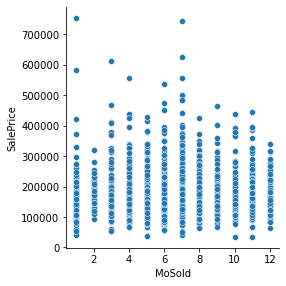

In [14]:
sns.pairplot(prop, x_vars=['MoSold'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
#from the bellow plot we can see there is no relationship at all between Month Sold and Sale Price

In [15]:
#converting bianry data to 0 and 1s

prop['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [16]:
prop[['CentralAir']]=prop[['CentralAir']].apply(lambda x: x.map({'Y':1,'N':0}))
prop['CentralAir'].astype('category').value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [17]:
prop['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [18]:
prop[['Street']]=prop[['Street']].apply(lambda x: x.map({'Pave':1,'Grvl':0}))

In [19]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# converting symboling to categorical
catglist = ['MSSubClass','OverallQual','OverallCond','CentralAir','Street']
prop[catglist] = prop[catglist].astype('object')
# prop.info()

In [21]:
# prop['WoodDeckSF'].astype('category').value_counts()

In [22]:
# assuming that NA in the follwong columns since according to the data dictionary it is part of the data
# so setting to 0
prop['LotFrontage'] = prop['LotFrontage'].fillna(0)
prop['MasVnrArea'] = prop['MasVnrArea'].fillna(0)

# 
prop['Electrical'] = prop['Electrical'].fillna('Mix')
# prop['LotFrontage'].astype('category').value_counts()

In [23]:
# similarly for Alley, change NA to None to indicate no alley access
varlist=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
         'GarageType','GarageFinish','GarageQual','GarageCond','Fence']
prop[varlist]=prop[varlist].fillna('None')

In [24]:
print(prop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [25]:
#converting year format to. no of years from current year
prop['YrSold_no'] = 2023-prop['YrSold']
prop['YearBuilt_no'] = 2023-prop['YearBuilt']
prop['YearRemodAdd_no'] = 2023-prop['YearRemodAdd']
prop['GarageBltNoYrs'] = 2023-prop['GarageYrBlt']
# setting GarageBltNoYrs nan value to o so as to set it to a numeric value
prop['GarageBltNoYrs'] = prop['GarageBltNoYrs'].fillna(0)
prop['GarageBltNoYrs'] = prop['GarageBltNoYrs'].astype('int64')

In [28]:
# all numeric (float and int) variables in the dataset
prop_numeric = prop.select_dtypes(include=['float64', 'int64'])
prop_numeric.head()

#removing ID from numeric data and year_data type
prop_numeric = prop_numeric.drop(['Id','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','LowQualFinSF',
 'BsmtHalfBath','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold_no'], axis=1)

In [32]:
pd.set_option('display.max_columns', None)
prop_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,YrSold_no,YearBuilt_no,YearRemodAdd_no,GarageBltNoYrs
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,180921.195890,15.184247,51.732192,38.134247,42.025342
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,79442.502883,1.328095,30.202904,20.645407,26.068188
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,13.000000,13.000000,13.000000,0.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000,14.000000,23.000000,19.000000,20.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,163000.000000,15.000000,50.000000,29.000000,38.500000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,214000.000000,16.000000,69.000000,56.000000,61.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,755000.000000,17.000000,151.000000,73.000000,123.000000


In [ ]:
sns.pairplot(prop, x_vars=['LotArea','BsmtFinSF2','2ndFlrSF','BsmtFullBath','HalfBath','WoodDeckSF','EnclosedPorch'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')

In [ ]:
# Removing these too from dataset as there seems to be spread eqaully against sale -'BsmtFullBath','HalfBath'

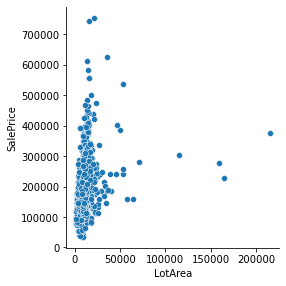

In [39]:
sns.pairplot(prop, x_vars=['LotArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')


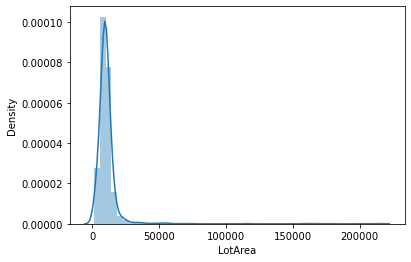

In [40]:
# LotArea variable:
sns.distplot(prop['LotArea'])
plt.show()

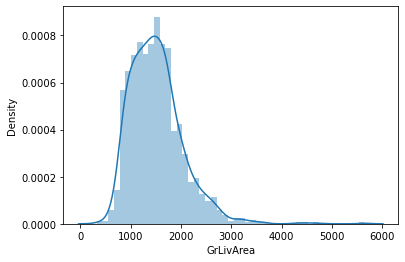

In [42]:
# GrLivArea variable:
sns.distplot(prop['GrLivArea'])
plt.show()

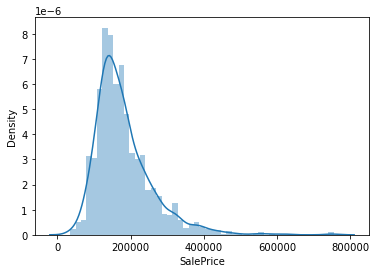

In [43]:
# target variable:  sale price of the house
sns.distplot(prop['SalePrice'])
plt.show()

In [ ]:
# list(prop_numeric.columns)

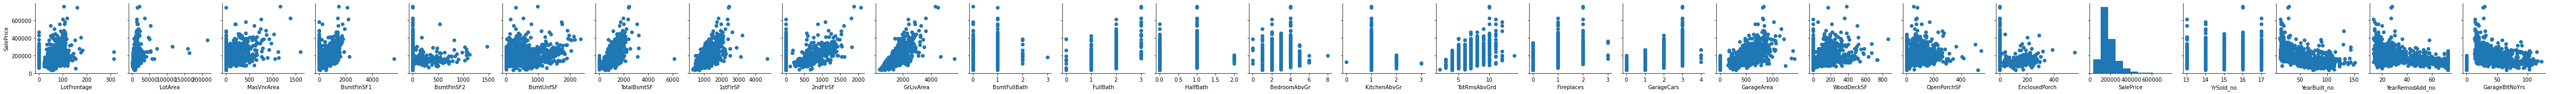

In [44]:
g=sns.PairGrid(prop, x_vars=list(prop_numeric.columns), y_vars='SalePrice')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [ ]:
# sns.distplot(prop['BsmtFinSF1'])
plt.show()

In [ ]:
# sns.distplot(prop['LotFrontage'])
plt.show()

In [ ]:
# sns.pairplot(prop, x_vars=['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
# plt.show()

In [45]:
# correlation matrix
cor = prop_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,YrSold_no,YearBuilt_no,YearRemodAdd_no,GarageBltNoYrs
LotFrontage,1.000000,0.100739,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.220347,0.010514,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.165229,0.201473,-0.016780,0.069605,0.027366,0.209624,0.012094,-0.036853,-0.078686,-0.033161
LotArea,0.100739,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.263843,0.014261,-0.014228,-0.013788,0.051767
MasVnrArea,0.105010,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.472614,0.008317,-0.311600,-0.176529,-0.179754
BsmtFinSF1,0.076670,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.386420,-0.014359,-0.249503,-0.128451,-0.096151
BsmtFinSF2,-0.009312,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.011378,-0.031706,0.049107,0.067759,0.095726
BsmtUnfSF,0.160829,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.214479,0.041258,-0.149040,-0.181133,-0.158427
TotalBsmtSF,0.238274,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.613581,0.014969,-0.391452,-0.291066,-0.224331
1stFlrSF,0.245181,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.605852,0.013604,-0.281986,-0.240379,-0.148539
2ndFlrSF,0.042549,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,0.319334,0.028700,-0.010308,-0.140024,-0.040029
GrLivArea,0.220347,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.009113,0.708624,0.036526,-0.199010,-0.287389,-0.145295


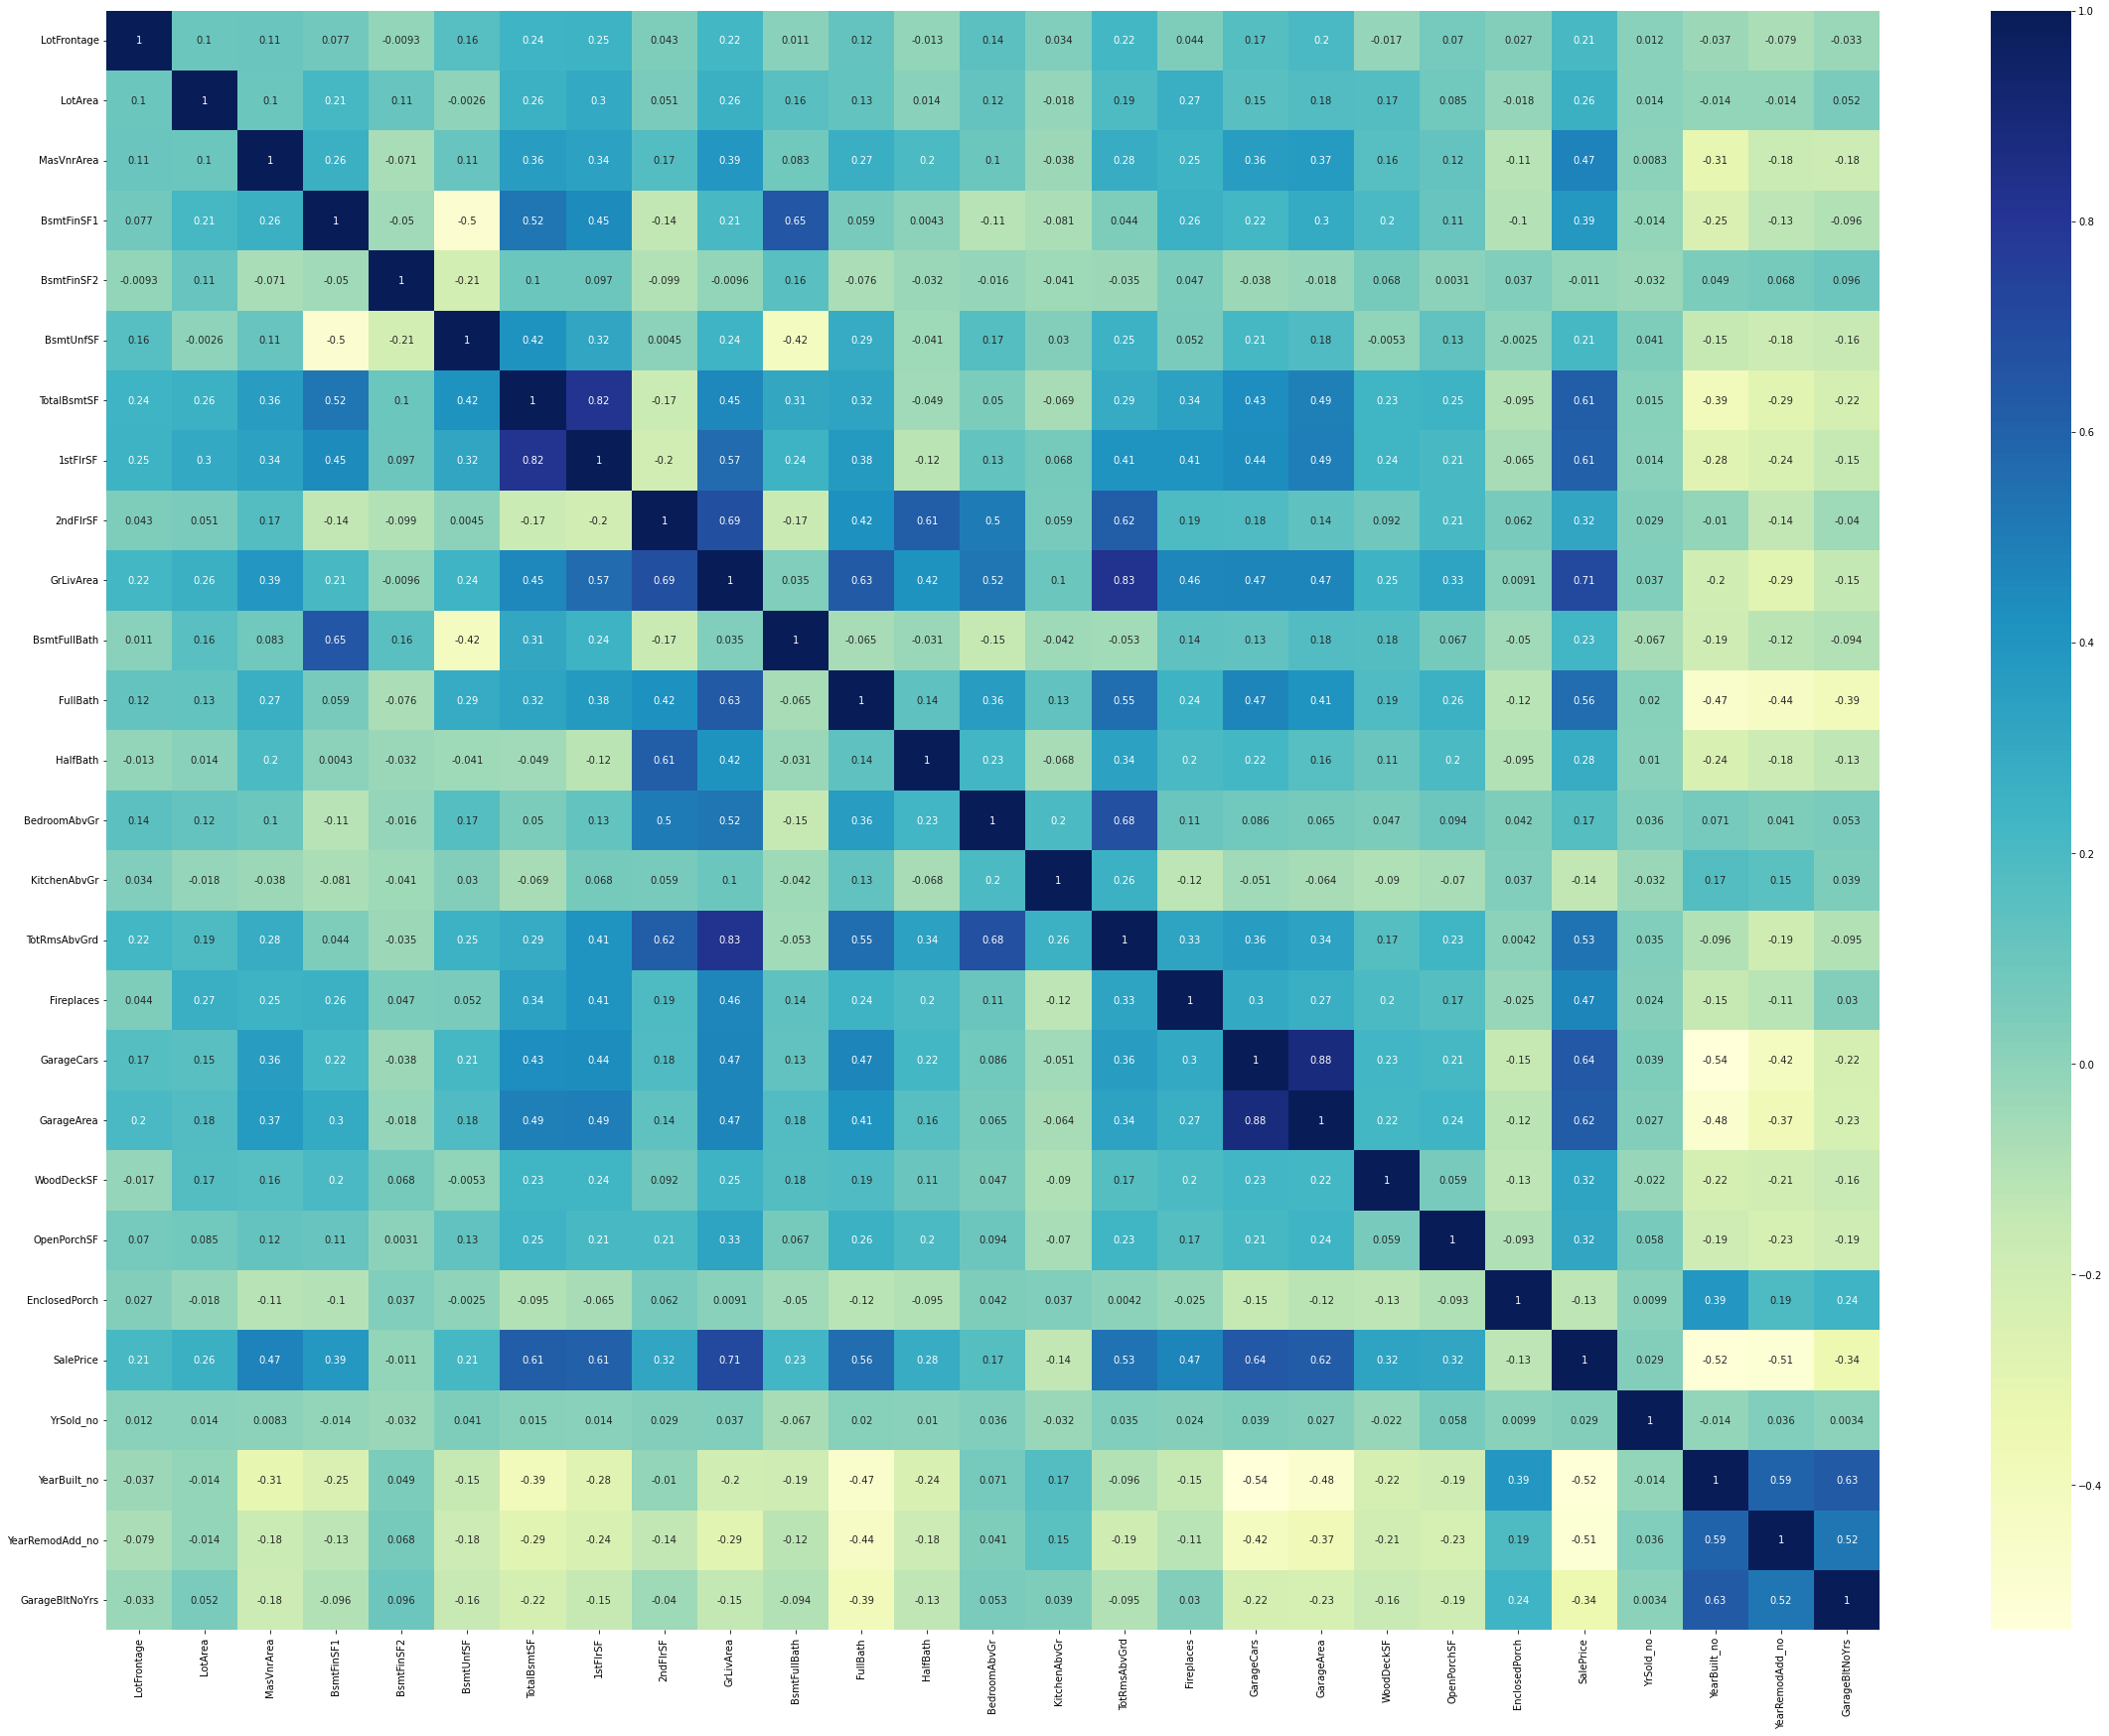

In [46]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


# from the corr table (0.046) and intution MoSold and does not contribute to Saleoprice 

In [47]:
prop.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YrSold_no,YearBuilt_no,YearRemodAdd_no,GarageBltNoYrs
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,57.623288,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,15.184247,51.732192,38.134247,42.025342
std,421.610009,34.664304,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,1.328095,30.202904,20.645407,26.068188
min,1.000000,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,13.000000,13.000000,13.000000,0.000000
25%,365.750000,42.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,14.000000,23.000000,19.000000,20.000000
50%,730.500000,63.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,15.000000,50.000000,29.000000,38.500000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,16.000000,69.000000,56.000000,61.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,17.000000,151.000000,73.000000,123.000000


In [ ]:
# prop['MSZoning'].astype('category').value_counts()

In [ ]:
# ['Id','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt',
#  'LowQualFinSF',
#  'BsmtHalfBath','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold_no','Alley']

## Data Preparation


In [48]:
# split into X and y
X = prop.loc[:, ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities',
                 'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                 'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual',
                 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF',
                 'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars',
                 'GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                 'Fence',
                 'SaleType','SaleCondition','GarageBltNoYrs','YearBuilt_no','YearRemodAdd_no']] # predictors in variable X

y = prop['SalePrice'] # response variable in Y


In [49]:
X.shape
#68 since excluded variables as explained above

(1460, 68)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   LotShape         1460 non-null   object 
 6   LandContour      1460 non-null   object 
 7   Utilities        1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  Condition2       1460 non-null   object 
 13  BldgType         1460 non-null   object 
 14  HouseStyle       1460 non-null   object 
 15  OverallQual      1460 non-null   object 
 16  OverallCond      1460 non-null   object 
 17  RoofStyle     

In [50]:
# creating dummy variables for categorical variables

# subset all categorical variables
prop_categorical = X.select_dtypes(include=['object'])
prop_categorical.head()
prop_categorical.shape

(1460, 43)

In [51]:
# convert into dummies - one hot encoding
prop_dummies = pd.get_dummies(prop_categorical, drop_first=True)
prop_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0

In [54]:
X.shape

(1460, 68)

In [55]:
# drop categorical variables 
X = X.drop(list(prop_categorical.columns), axis=1)

In [56]:
# concat dummy variables with X
X = pd.concat([X, prop_dummies], axis=1)

In [57]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

In [ ]:
X.head()

In [58]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##  Model Building and Evaluation

predicting house sale prices using linear regression.


In [59]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-146911118813324.66
[ 1.20067037e+03  6.93264460e+03  2.28206258e+03  2.54501179e+16
  9.00156040e+15  2.46560254e+16 -2.44796075e+16  1.73510561e+04
  3.00443437e+04  6.75050000e+03  7.40000000e+02  8.56000000e+02
 -1.39100000e+03 -1.40200000e+03 -3.58800000e+03 -2.05600000e+03
  1.40500000e+03  2.45962500e+03  3.02075000e+03  2.55000000e+02
  1.32025000e+03  4.78875000e+02 -3.80750000e+02 -1.35870000e+04
 -2.30950000e+03  9.97250000e+02  2.86000000e+02 -1.09462500e+03
 -3.78812500e+02  1.26725000e+03  8.50500000e+02 -1.09925000e+03
 -8.21000000e+02 -1.06750000e+03  1.05741479e+15  6.60625000e+02
  5.96500000e+02  2.25500000e+02 -1.07178020e+16  7.10187500e+03
  3.97150000e+03  1.50930000e+04  1.18445000e+04  1.44200000e+03
  4.44000000e+02  4.42500000e+02  8.10000000e+01 -5.17500000e+02
 -1.04800000e+03  9.73750000e+02 -6.95000000e+01  1.74000000e+03
 -1.35250000e+03  3.25250000e+02 -6.15000000e+02  7.56500000e+02
 -2.63800000e+03  6.66625000e+02  6.91000000e+02  1.33962500e+03
 -2.0

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9558246619332855
-9.282149902613306e+21
281869526568.7783
2.6163712239086127e+34
276072014.26912665
5.9734502828963755e+31


In [63]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

-9.282149902613306e+21


In [65]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 75,100,150,200,250,300, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   75, 100, 150, 200, 250, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [67]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.00393679e+02  2.67865200e+03  3.33783604e+03  2.18461773e+03
  8.91452982e+02  8.26528856e+02  3.43151594e+03  5.27038972e+03
  4.64583265e+03  7.62525961e+03  2.31207987e+03  4.18431251e+03
  1.94488839e+03  5.56505280e+02 -1.82497329e+03  3.89057130e+03
  2.72970356e+03  4.43619194e+03  3.01999623e+03  1.42239677e+03
  9.65960649e+02  9.72479566e+01 -8.68368123e+02 -1.98832307e+03
 -3.07855310e+03 -9.79280859e+02  3.32945360e+01  4.14266275e+01
  2.76128088e+02  4.90893486e+02  8.44117017e+02  2.87204229e+02
 -8.41452064e+02 -3.68444916e+02 -8.65289959e+02 -1.47640498e+03
 -1.42648166e+03 -6.70782989e+02 -9.61526266e+02  7.06937959e+02
  2.93586716e+02  1.21007115e+03 -7.96429421e+02  6.87870116e+02
  4.85037198e+02 -2.07940456e+03 -4.24070278e+02  1.07682833e+03
  6.25795802e+02  1.62292957e+03 -7.44197009e+02  2.01557839e+03
 -1.10105702e+03 -2.84446372e+02 -4.97321879e+02  7.77764690e+02
  2.15250397e+02 -6.35068708e+01 -2.02959690e+02  1.76822342e+02
  5.45221338e+02 -9.54153

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8930173235958231
0.860829121052119
682624234896.9753
392282700350.25977
668583971.4955684
895622603.5394058


In [69]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   75, 100, 150, 200, 250, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 300}


In [71]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =300

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=300)

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9443653851964218
0.8424052193862621
354987719886.56085
444214382833.7526
347686307.43051994
1014188088.6615356


In [73]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.558247e-01,8.930173e-01,9.443654e-01
1,R2 Score (Test),-9.282150e+21,8.608291e-01,8.424052e-01
2,RSS (Train),2.818695e+11,6.826242e+11,3.549877e+11
3,RSS (Test),2.616371e+34,3.922827e+11,4.442144e+11
4,MSE (Train),1.661541e+04,2.585699e+04,1.864635e+04
5,MSE (Test),7.728810e+15,2.992695e+04,3.184632e+04


In [74]:
betas = pd.DataFrame(index=X.columns)

In [75]:
betas.rows = X.columns

In [76]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [77]:
pd.set_option('display.max_rows', None)
betas.head(287)

,Linear,Ridge,Lasso
LotFrontage,1.200670e+03,100.393679,0.000000
LotArea,6.932645e+03,2678.652002,4320.001560
MasVnrArea,2.282063e+03,3337.836040,2014.347471
BsmtFinSF1,2.545012e+16,2184.617734,4419.514788
BsmtFinSF2,9.001560e+15,891.452982,558.365830
BsmtUnfSF,2.465603e+16,826.528856,-0.000000
TotalBsmtSF,-2.447961e+16,3431.515939,7160.088767
1stFlrSF,1.735106e+04,5270.389721,0.000000
2ndFlrSF,3.004434e+04,4645.832655,4232.136673
GrLivArea,6.750500e+03,7625.259605,28783.208804


The Ridge regression performed best on both the train and test data. The lasso regression has 10% change in Rsquare between train and test data, therefore for this dataset Ridge regression is generates a better model as compared to Lasso
